In [54]:
import pandas as pd
import numpy as np
import datetime as dt
import math as m

In [55]:
data = pd.read_csv('/home/ganesh/Github/markets/data/nifty_monthly_data.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
164,2022-09-01,17485.699219,18096.150391,16747.699219,17094.349609,17094.349609,6896300
165,2022-10-01,17102.099609,18022.800781,16855.550781,18012.199219,18012.199219,4539900
166,2022-11-01,18130.699219,18816.050781,17959.199219,18758.349609,18758.349609,5257200
167,2022-12-01,18871.949219,18887.599609,17779.500000,17806.800781,17806.800781,3683600
168,2022-12-23,17977.650391,18050.449219,17779.500000,17806.800781,17806.800781,0


In [56]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [57]:
data.shape

(169, 7)

In [58]:
df = data[:-2]
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
162,2022-07-01,15703.700195,17172.800781,15511.049805,17158.250000,17158.250000,5475300
163,2022-08-01,17243.199219,17992.199219,17154.800781,17759.300781,17759.300781,5589500
164,2022-09-01,17485.699219,18096.150391,16747.699219,17094.349609,17094.349609,6896300
165,2022-10-01,17102.099609,18022.800781,16855.550781,18012.199219,18012.199219,4539900
166,2022-11-01,18130.699219,18816.050781,17959.199219,18758.349609,18758.349609,5257200


In [59]:
df.shape

(167, 7)

In [60]:
df['return'] = df['Close'].pct_change()
df

/tmp/ipykernel_7966/360322641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return'] = df['Close'].pct_change()


,Date,Open,High,Low,Close,Adj Close,Volume,return
0,2009-01-01,2963.300049,3147.199951,2661.649902,2874.800049,2874.800049,0,NaN
1,2009-02-01,2872.350098,2969.750000,2677.550049,2763.649902,2763.649902,0,-0.038664
2,2009-03-01,2764.600098,3123.350098,2539.449951,3020.949951,3020.949951,0,0.093102
3,2009-04-01,3023.850098,3517.250000,2965.699951,3473.949951,3473.949951,0,0.149953
4,2009-05-01,3478.699951,4509.399902,3478.699951,4448.950195,4448.950195,0,0.280660
...,...,...,...,...,...,...,...,...
162,2022-07-01,15703.700195,17172.800781,15511.049805,17158.250000,17158.250000,5475300,0.087324
163,2022-08-01,17243.199219,17992.199219,17154.800781,17759.300781,17759.300781,5589500,0.035030
164,2022-09-01,17485.699219,18096.150391,16747.699219,17094.349609,17094.349609,6896300,-0.037442
165,2022-10-01,17102.099609,18022.800781,16855.550781,18012.199219,18012.199219,4539900,0.053693


In [61]:
import seaborn as sns

<AxesSubplot:xlabel='return', ylabel='Count'>

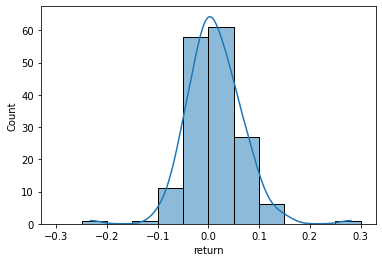

In [62]:
sns.histplot(data=df["return"],binwidth=0.05, binrange=(-0.3, 0.3), stat='count', kde=True)

In [63]:
df['return'].describe()

count    166.000000
mean       0.012878
std        0.055614
min       -0.232464
25%       -0.018939
50%        0.008573
75%        0.044250
max        0.280660
Name: return, dtype: float64

In [74]:
returns = df[1:]['return']
returns

1     -0.038664
2      0.093102
3      0.149953
4      0.280660
5     -0.035480
         ...   
162    0.087324
163    0.035030
164   -0.037442
165    0.053693
166    0.041425
Name: return, Length: 166, dtype: float64

In [88]:
losing_streaks = []

losing_streak = []
for ret in returns:
    ret = round(float(ret), 2)
    # print(ret)
    if ret < 0:
        losing_streak.append(ret*100)
    else:
        if len(losing_streak) >1:
            losing_streaks.append(losing_streak)
        losing_streak = []
print(f"Nifty losing streaks on monthly basis since 2009:")
losing_streaks

Nifty losing streaks on monthly basis since 2009:


[[-10.0, -3.0],
 [-1.0, -5.0],
 [-3.0, -9.0, -1.0],
 [-9.0, -4.0],
 [-2.0, -1.0, -6.0],
 [-2.0, -2.0, -5.0],
 [-4.0, -4.0],
 [-5.0, -8.0],
 [-2.0, -1.0],
 [-5.0, -4.0],
 [-6.0, -5.0],
 [-1.0, -6.0, -1.0],
 [-2.0, -6.0, -23.0],
 [-2.0, -3.0, -5.0]]

In [87]:
winning_streaks = []

winning_streak = []
for ret in returns:
    ret = round(float(ret*100), 2)
    # print(ret)
    if ret > 0:
        winning_streak.append(ret)
    else:
        if len(winning_streak) > 1: 
            winning_streaks.append(winning_streak)
        winning_streak = []
print(f"Nifty winning streaks on monthly basis since 2009:")
winning_streaks

Nifty winning streaks on monthly basis since 2009:


[[9.31, 15.0, 28.07],
 [8.05, 0.55, 9.05],
 [6.81, 3.35],
 [0.82, 6.64, 0.55],
 [4.45, 1.04, 0.65, 11.62],
 [12.43, 3.58],
 [0.56, 8.46],
 [4.63, 0.43, 2.2],
 [4.36, 0.94],
 [4.82, 9.83],
 [3.08, 6.81],
 [7.97, 5.28, 1.44, 3.02, 0.13, 4.49, 3.2],
 [6.35, 0.41],
 [10.75, 1.44, 3.95, 1.56, 4.23, 1.71],
 [4.59, 3.72, 3.31, 1.42, 3.41],
 [2.97, 4.72],
 [5.99, 2.85],
 [7.7, 1.07, 1.49],
 [4.09, 3.51, 1.5, 0.93],
 [7.53, 7.49, 2.84],
 [3.51, 11.39, 7.81],
 [6.56, 1.11],
 [6.5, 0.89, 0.26, 8.69, 2.84, 0.3],
 [8.73, 3.5]]